<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Análisis Exploratorio de datos</header1></center>

# Instalación de librerias

In [46]:
#Para esta actividad se instalarán las siguientes librerías:
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install ann_visualizer

# Importación de librerias necesarias

In [66]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar el Dataset

In [67]:
# Cargamos el Dataset
url = 'https://raw.githubusercontent.com/LeidyYasaca/datos_TFM/refs/heads/main/dataset_produccion.csv'
df= pd.read_csv(url)

## Analisis descriptivo

### Visualizacion del Dataset

Se muestran las 5 primeras instancias del dataset, para hechar un vistazo:

In [68]:
df.head(5)

Energía Eléctrica (categoría)  Subcategoría  Potencia Nominal (MW)  \
0                     Renovable    Hidráulica                5098.75   
1                     Renovable        Eólica                  21.15   
2                     Renovable  Fotovoltaica                  27.63   
3                     Renovable       Biomasa                 144.30   
4                     Renovable        Biogas                   7.26   

   Potencia Nominal (%)  Potencia Efectiva (MW)  Potencia Efectiva (%)  \
0                0.5852                 5064.16                 0.6256   
1                0.0024                   21.15                 0.0026   
2                0.0032                   26.74                 0.0033   
3                0.0166                  136.40                 0.0168   
4                0.0008                    6.50                 0.0008   

   Producción Total (GWh)  Producción Total (%)  Producción SNI (GWh)  \
0                24010.39                0.7732              23989.85   
1                   74.03                0.0024                 68.83   
2                   37.98                0.0012                 34.10   
3                  413.47                0.0133                413.47   
4                   44.31                0.0014                 44.31   

   Producción SNI (%)  Entregada a Servicio Público (GWh)  \
0              0.8854                            22768.40   
1              0.0025                               72.22   
2              0.0013                               37.41   
3              0.0153                              176.05   
4              0.0016                               43.95   

   Entregada a Servicio Público (%)      Mes   Año  
0                            0.8968  Febrero  2021  
1                            0.0028  Febrero  2021  
2                            0.0015  Febrero  2021  
3                            0.0069  Febrero  2021  
4                            0.0017  Febrero  2021

### Inspección de los datos

In [69]:
# Dimensiones del dataset (filas, columnas)
print('Dimensiones del dataset (filas, columnas):', df.shape)

# Nombre de las columnas
print('\nNombre de las columnas:', df.columns.values)

# Tipo de datos de cada columna
print('\nTipo de datos de cada columna:', df.dtypes)

Dimensiones del dataset (filas, columnas): (440, 14)

Nombre de las columnas: ['Energía Eléctrica (categoría)' 'Subcategoría' 'Potencia Nominal (MW)'
 'Potencia Nominal (%)' 'Potencia Efectiva (MW)' 'Potencia Efectiva (%)'
 'Producción Total (GWh)' 'Producción Total (%)' 'Producción SNI (GWh)'
 'Producción SNI (%)' 'Entregada a Servicio Público (GWh)'
 'Entregada a Servicio Público (%)' 'Mes' 'Año']

Tipo de datos de cada columna: Energía Eléctrica (categoría)          object
Subcategoría                           object
Potencia Nominal (MW)                 float64
Potencia Nominal (%)                  float64
Potencia Efectiva (MW)                float64
Potencia Efectiva (%)                 float64
Producción Total (GWh)                float64
Producción Total (%)                  float64
Producción SNI (GWh)                  float64
Producción SNI (%)                    float64
Entregada a Servicio Público (GWh)    float64
Entregada a Servicio Público (%)      float64
Mes          

In [70]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Energía Eléctrica (categoría)       440 non-null    object 
 1   Subcategoría                        440 non-null    object 
 2   Potencia Nominal (MW)               440 non-null    float64
 3   Potencia Nominal (%)                440 non-null    float64
 4   Potencia Efectiva (MW)              440 non-null    float64
 5   Potencia Efectiva (%)               440 non-null    float64
 6   Producción Total (GWh)              440 non-null    float64
 7   Producción Total (%)                440 non-null    float64
 8   Producción SNI (GWh)                440 non-null    float64
 9   Producción SNI (%)                  440 non-null    float64
 10  Entregada a Servicio Público (GWh)  440 non-null    float64
 11  Entregada a Servicio Público (%)    440 non-n

In [71]:
# Resumen estadístico (solamente se calcula en variables numéricas)
df= df.drop(columns=['Potencia Nominal (%)', 'Potencia Efectiva (%)', 'Producción Total (%)', 'Producción SNI (GWh)', 'Entregada a Servicio Público (%)'], errors='ignore')
df.describe().T

count         mean          std      min  \
Potencia Nominal (MW)               440.0   949.367909  1527.337840     7.26   
Potencia Efectiva (MW)              440.0   876.657455  1492.608291     6.50   
Producción Total (GWh)              440.0  3421.370795  7402.528204     0.00   
Producción SNI (%)                  440.0     0.099998     0.246985     0.00   
Entregada a Servicio Público (GWh)  440.0  2809.331114  6948.523855     0.00   
Año                                 440.0  2022.431818     1.075673  2021.00   

                                          25%        50%        75%  \
Potencia Nominal (MW)                 47.1450   308.4650   943.8500   
Potencia Efectiva (MW)                44.3500   293.4000   790.5500   
Producción Total (GWh)                41.1825   381.9650  1447.6825   
Producción SNI (%)                     0.0014     0.0132     0.0360   
Entregada a Servicio Público (GWh)    40.9100   225.0750  1140.3925   
Año                                 2021.7500  2022.0000  2023.0000   

                                           max  
Potencia Nominal (MW)                5215.1700  
Potencia Efectiva (MW)               5209.1100  
Producción Total (GWh)              26489.7200  
Producción SNI (%)                      0.8955  
Entregada a Servicio Público (GWh)  24845.8200  
Año                                  2024.0000

In [72]:
# Convertir columnas categóricas a str y eliminar espacios vacios en celdas
df['Energía Eléctrica (categoría)'] = df['Energía Eléctrica (categoría)'].astype(str).str.strip()
df['Subcategoría'] = df['Subcategoría'].astype(str).str.strip()

In [73]:
# Conteo de valores de los atributos de entrada categóricos
columnas_cat = ['Energía Eléctrica (categoría)', 'Subcategoría'] 
tablas = []
for col in columnas_cat:
    count = df[col].value_counts().reset_index()
    count.columns = [col, 'Frecuencia']
    tablas.append(count)
combined_table = pd.concat(tablas, axis=1)
combined_table

Energía Eléctrica (categoría)  Frecuencia        Subcategoría  Frecuencia
0                     Renovable       220.0          Hidráulica          44
1                  No Renovable       132.0              Eólica          44
2               Interconexiones        88.0        Fotovoltaica          44
3                           NaN         NaN             Biomasa          44
4                           NaN         NaN              Biogas          44
5                           NaN         NaN         Térmica MCI          44
6                           NaN         NaN    Térmica Turbogas          44
7                           NaN         NaN  Térmica Turbovapor          44
8                           NaN         NaN            Colombia          44
9                           NaN         NaN                Perú          44

## Ajuste de tipos de variables

In [74]:
# Diccionario para convertir nombres de meses a números
meses_dict = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5, "Junio": 6,
    "Julio": 7, "Agosto": 8, "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

# Convertir el mes a número
df["Mes_Numero"] = df["Mes"].map(meses_dict)

# Crear nueva columna de tipo fecha (usando el día 1 por defecto)
df["Fecha"] = pd.to_datetime(df["Año"].astype(str) + "-" + df["Mes_Numero"].astype(str) + "-01")

# Verificar el resultado
df[["Año", "Mes", "Fecha"]].head()

Año      Mes      Fecha
0  2021  Febrero 2021-02-01
1  2021  Febrero 2021-02-01
2  2021  Febrero 2021-02-01
3  2021  Febrero 2021-02-01
4  2021  Febrero 2021-02-01

In [75]:
# Eliminar columnas innecesarias para el análisis posterior
df= df.drop(columns=['Mes_Numero', 'Potencia Nominal (%)', 'Potencia Efectiva (%)', 'Producción Total (%)', 'Producción SNI (GWh)', 'Producción SNI (%)', 'Entregada a Servicio Público (%)', 'Mes', 'Año'], errors='ignore')
df.head()

Energía Eléctrica (categoría)  Subcategoría  Potencia Nominal (MW)  \
0                     Renovable    Hidráulica                5098.75   
1                     Renovable        Eólica                  21.15   
2                     Renovable  Fotovoltaica                  27.63   
3                     Renovable       Biomasa                 144.30   
4                     Renovable        Biogas                   7.26   

   Potencia Efectiva (MW)  Producción Total (GWh)  \
0                 5064.16                24010.39   
1                   21.15                   74.03   
2                   26.74                   37.98   
3                  136.40                  413.47   
4                    6.50                   44.31   

   Entregada a Servicio Público (GWh)      Fecha  
0                            22768.40 2021-02-01  
1                               72.22 2021-02-01  
2                               37.41 2021-02-01  
3                              176.05 2021-02-01  
4                               43.95 2021-02-01

## Detección y tratamiento de datos ausentes

In [76]:
# Ver cuántos valores faltan en cada columna
df.isnull().sum()

Energía Eléctrica (categoría)         0
Subcategoría                          0
Potencia Nominal (MW)                 0
Potencia Efectiva (MW)                0
Producción Total (GWh)                0
Entregada a Servicio Público (GWh)    0
Fecha                                 0
dtype: int64

El dataset no contiene valores desconocidos

In [77]:
# Si fuera el caso de existir valores nulos en el dataset, se pueden realizar las siguientes acciones:
# Opciones para tratar valores nulos:
# 1. Eliminar filas con valores nulos
#df_cleaned = df.dropna()

# 2. Rellenar valores nulos con un valor específico (ejemplo: 0 o la media)
#df_filled = df.fillna(df.mean())  

## Identificación de datos atípicos

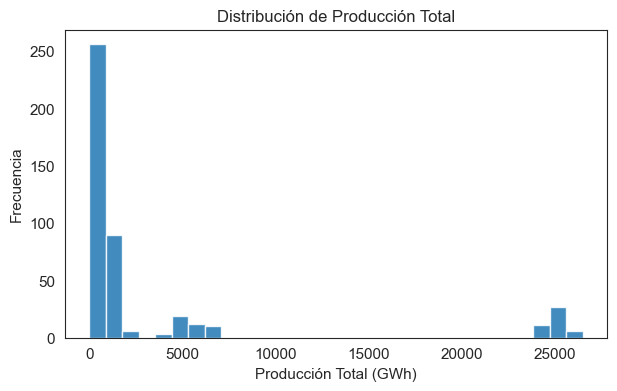

In [78]:
# Histograma de Producción Total (GWh)
sns.set_style("white")
plt.figure(figsize=(7, 4))
plt.hist(df["Producción Total (GWh)"], bins=30, color="#1f77b4", edgecolor="white", alpha=0.85)
plt.xticks(fontsize=11) 
plt.yticks(fontsize=11)
plt.title("Distribución de Producción Total", fontsize=12)
plt.xlabel("Producción Total (GWh)", fontsize=11)
plt.ylabel("Frecuencia", fontsize=11)
plt.show()

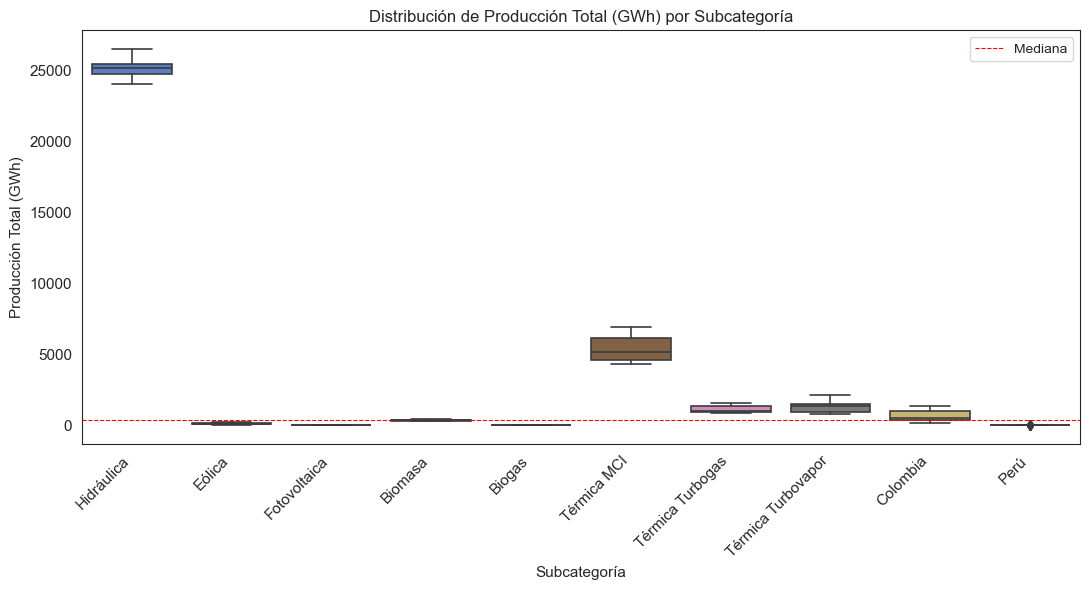

In [79]:
# Boxplot por subcategoria (Para comparar distribuciones)
sns.set_style("white")
plt.figure(figsize=(11,6))
sns.boxplot(x=df["Subcategoría"], y=df["Producción Total (GWh)"], palette="muted", linewidth=1.2)
plt.xticks(rotation=45, ha="right", fontsize=11) 
plt.yticks(fontsize=11)
plt.axhline(y=df["Producción Total (GWh)"].median(), color='red', linestyle='--', label="Mediana", linewidth=0.8)
plt.title("Distribución de Producción Total (GWh) por Subcategoría", fontsize=12)
plt.xlabel("Subcategoría", fontsize=11)
plt.ylabel("Producción Total (GWh)", fontsize=11)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [80]:
# Reemplazar valores de 0, para que sirva la escala logarítmica
df["Producción Total (GWh)"] = df["Producción Total (GWh)"].replace(0, 0.01)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


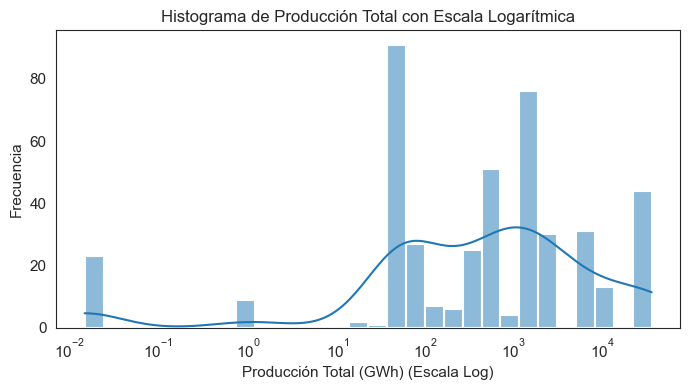

In [81]:
# Histograma de Producción Total (GWh) con escala logarítmica
sns.set_style("white")
plt.figure(figsize=(7,4))
sns.histplot(df[df["Producción Total (GWh)"] > 0], x="Producción Total (GWh)", 
             bins=30, log_scale=True, kde=True, color="#1f77b4", linewidth=1.5)
plt.xticks(ha="right", fontsize=11) 
plt.yticks(fontsize=11)
plt.xlabel("Producción Total (GWh) (Escala Log)", fontsize=11)
plt.ylabel("Frecuencia", fontsize=11)
plt.title("Histograma de Producción Total con Escala Logarítmica", fontsize=12)
plt.tight_layout()
plt.show()

## Correlación de variables

In [82]:
# Excluir columnas no numéricas
df_numeric = df.drop(columns=['Energía Eléctrica (categoría)', 'Subcategoría', 'Fecha'])
correlation_matrix = df_numeric.corr()

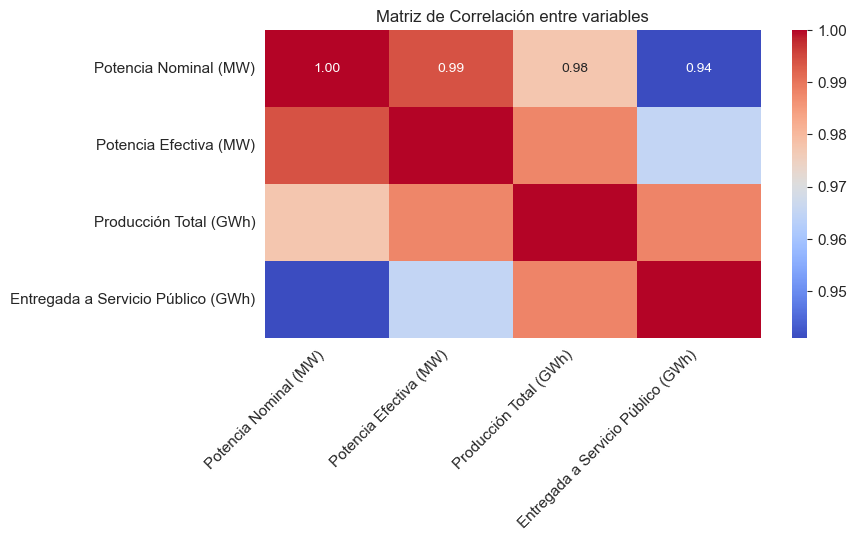

In [84]:
# Mapa de calor de correlaciones
plt.figure(figsize=(8, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=11)  
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title("Matriz de Correlación entre variables", fontsize=12)
plt.show()

## Análisis temporal

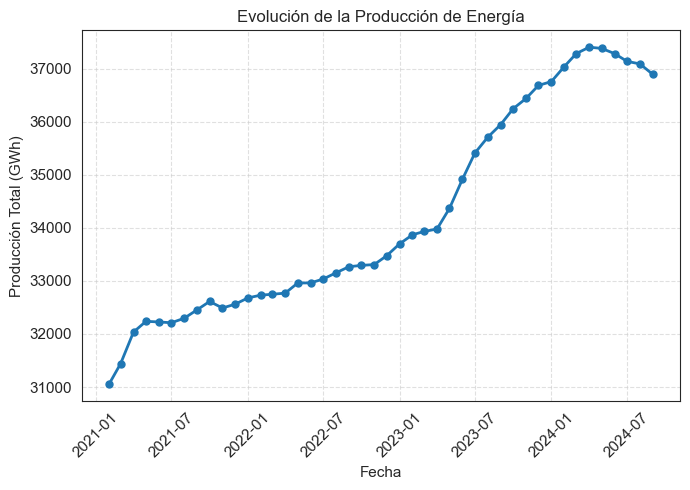

In [85]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(df.groupby("Fecha")["Producción Total (GWh)"].sum(), 
        marker="o", color="#1f77b4", linewidth=2, markersize=5)
ax.set_title("Evolución de la Producción de Energía", fontsize=12)
ax.set_xlabel("Fecha", fontsize=11)
ax.set_ylabel("Producción Total (GWh)", fontsize=11)
ax.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()